# Analyse des résultats des expériences pour un fichier client donné

Nom du fichier client à analyser :

In [1]:
clients = "daily_issda_300"

In [2]:
%pylab inline
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv("./expes_all.csv")
df = df[df.expe.notnull()]
df = df[(df["clients"] == clients) & (df["wall_time"] == 1000) & (df["method"] == "rng")]
df.days_size = df.days_size.astype(int)
df.agg_size = df.agg_size.astype(int)
df["success"] = (df.nsols == 1) & (df.wall_hit == False)
df = df.sort_values(by=['clients', 'agg_size', 'method', 'days_size'], ascending=True)
df

Unnamed: 0                                 expe          clients  \
42573          84  ./expes/v2_2020-11-23_di_250-prng-1  daily_issda_300   
42994         259  ./expes/v2_2020-11-23_di_250-prng-1  daily_issda_300   
43612         270  ./expes/v2_2020-11-23_di_250-prng-1  daily_issda_300   
45043         138  ./expes/v2_2020-11-23_di_250-prng-1  daily_issda_300   
45604         154  ./expes/v2_2020-11-23_di_250-prng-1  daily_issda_300   
...           ...                                  ...              ...   
55385          91  ./expes/v2_2020-11-23_di_250-prng-1  daily_issda_300   
55564         270  ./expes/v2_2020-11-23_di_250-prng-1  daily_issda_300   
56345         218  ./expes/v2_2020-11-23_di_250-prng-1  daily_issda_300   
56359         232  ./expes/v2_2020-11-23_di_250-prng-1  daily_issda_300   
59192         126  ./expes/v2_2020-11-23_di_250-prng-1  daily_issda_300   

       clients_size clients_subset  agg_size method           days  days_size  \
42573           300        rng-300         1    rng    num-start-1          1   
42994           300        rng-300         1    rng    num-start-1          1   
43612           300        rng-300         1    rng    num-start-1          1   
45043           300        rng-300         1    rng    num-start-1          1   
45604           300        rng-300         1    rng    num-start-1          1   
...             ...            ...       ...    ...            ...        ...   
55385           300        rng-300       291    rng  num-start-291        291   
55564           300        rng-300       291    rng  num-start-291        291   
56345           300        rng-300       291    rng  num-start-291        291   
56359           300        rng-300       291    rng  num-start-291        291   
59192           300        rng-300       291    rng  num-start-291        291   

       days_total      time  valid  valid_sum  success  nsols  wall_hit  \
42573         536  0.073527   True        NaN     True      1     False   
42994         536  0.036271   True        NaN     True      1     False   
43612         536  0.035273   True        NaN     True      1     False   
45043         536  0.026578   True        NaN     True      1     False   
45604         536  0.039129   True        NaN     True      1     False   
...           ...       ...    ...        ...      ...    ...       ...   
55385         536  7.412287   True        NaN     True      1     False   
55564         536  7.240925   True        NaN     True      1     False   
56345         536  6.886496   True        NaN     True      1     False   
56359         536  7.082656   True        NaN     True      1     False   
59192         536  5.238851   True        NaN     True      1     False   

       wall_time  pooled  valid_sums  
42573       1000    True         1.0  
42994       1000    True         1.0  
43612       1000    True         1.0  
45043       1000    True         1.0  
45604       1000    True         1.0  
...          ...     ...         ...  
55385       1000    True         1.0  
55564       1000    True         1.0  
56345       1000    True         1.0  
56359       1000    True         1.0  
59192       1000    True         1.0  

[17997 rows x 19 columns]

## Paramètres des expériences

### Temps maximums (wall_times)

Liste des temps maximums explorés

In [4]:
df.wall_time.unique()

array([1000])

## Méthode de recherche

- True : Pooled : force la recherche de deux solutions
- False : Non pooled : cherche une unique solution optimale

In [5]:
df.pooled.unique()

array([ True])

### Tailles d'agrégats

Tailles :

In [6]:
df.agg_size.unique()

array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141, 151, 161, 171, 181, 191, 201, 211, 221, 231, 241, 251,
       261, 271, 281, 291])

Méthodes de sélection :

In [7]:
df.method.unique()

array(['rng'], dtype=object)

### Jours sélectionés (contraintes)

In [8]:
df.days.unique()

array(['num-start-1', 'num-start-11', 'num-start-21', 'num-start-31',
       'num-start-41', 'num-start-51', 'num-start-61', 'num-start-71',
       'num-start-81', 'num-start-91', 'num-start-101', 'num-start-111',
       'num-start-121', 'num-start-131', 'num-start-141', 'num-start-151',
       'num-start-161', 'num-start-171', 'num-start-181', 'num-start-191',
       'num-start-201', 'num-start-211', 'num-start-221', 'num-start-231',
       'num-start-241', 'num-start-251', 'num-start-261', 'num-start-271',
       'num-start-281', 'num-start-291'], dtype=object)

Correspondant aux nombres de jours suivant :

In [9]:
df.days_size.unique()

array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141, 151, 161, 171, 181, 191, 201, 211, 221, 231, 241, 251,
       261, 271, 281, 291])

## Statistiques générales

In [10]:
df_tmp = pd.DataFrame()
df_tmp["agg_size"] = df.agg_size
df_tmp["days_size"] = df.days_size
df_tmp["time"] = df.time
df_tmp["success"] = df.success

df_tmp

agg_size  days_size      time  success
42573         1          1  0.073527     True
42994         1          1  0.036271     True
43612         1          1  0.035273     True
45043         1          1  0.026578     True
45604         1          1  0.039129     True
...         ...        ...       ...      ...
55385       291        291  7.412287     True
55564       291        291  7.240925     True
56345       291        291  6.886496     True
56359       291        291  7.082656     True
59192       291        291  5.238851     True

[17997 rows x 4 columns]

## Evolution en fonction du nombre de jours

### Temps bruts en fonction du nombre de jours et de la taille de l'agrégat


In [11]:
df_days_a = df[(df.wall_time == 1000) & (df["method"] == "rng")]
df_days_a.agg_size = df_days_a.agg_size.astype(str)

df_days_a

Unnamed: 0                                 expe          clients  \
42573          84  ./expes/v2_2020-11-23_di_250-prng-1  daily_issda_300   
42994         259  ./expes/v2_2020-11-23_di_250-prng-1  daily_issda_300   
43612         270  ./expes/v2_2020-11-23_di_250-prng-1  daily_issda_300   
45043         138  ./expes/v2_2020-11-23_di_250-prng-1  daily_issda_300   
45604         154  ./expes/v2_2020-11-23_di_250-prng-1  daily_issda_300   
...           ...                                  ...              ...   
55385          91  ./expes/v2_2020-11-23_di_250-prng-1  daily_issda_300   
55564         270  ./expes/v2_2020-11-23_di_250-prng-1  daily_issda_300   
56345         218  ./expes/v2_2020-11-23_di_250-prng-1  daily_issda_300   
56359         232  ./expes/v2_2020-11-23_di_250-prng-1  daily_issda_300   
59192         126  ./expes/v2_2020-11-23_di_250-prng-1  daily_issda_300   

       clients_size clients_subset agg_size method           days  days_size  \
42573           300        rng-300        1    rng    num-start-1          1   
42994           300        rng-300        1    rng    num-start-1          1   
43612           300        rng-300        1    rng    num-start-1          1   
45043           300        rng-300        1    rng    num-start-1          1   
45604           300        rng-300        1    rng    num-start-1          1   
...             ...            ...      ...    ...            ...        ...   
55385           300        rng-300      291    rng  num-start-291        291   
55564           300        rng-300      291    rng  num-start-291        291   
56345           300        rng-300      291    rng  num-start-291        291   
56359           300        rng-300      291    rng  num-start-291        291   
59192           300        rng-300      291    rng  num-start-291        291   

       days_total      time  valid  valid_sum  success  nsols  wall_hit  \
42573         536  0.073527   True        NaN     True      1     False   
42994         536  0.036271   True        NaN     True      1     False   
43612         536  0.035273   True        NaN     True      1     False   
45043         536  0.026578   True        NaN     True      1     False   
45604         536  0.039129   True        NaN     True      1     False   
...           ...       ...    ...        ...      ...    ...       ...   
55385         536  7.412287   True        NaN     True      1     False   
55564         536  7.240925   True        NaN     True      1     False   
56345         536  6.886496   True        NaN     True      1     False   
56359         536  7.082656   True        NaN     True      1     False   
59192         536  5.238851   True        NaN     True      1     False   

       wall_time  pooled  valid_sums  
42573       1000    True         1.0  
42994       1000    True         1.0  
43612       1000    True         1.0  
45043       1000    True         1.0  
45604       1000    True         1.0  
...          ...     ...         ...  
55385       1000    True         1.0  
55564       1000    True         1.0  
56345       1000    True         1.0  
56359       1000    True         1.0  
59192       1000    True         1.0  

[17997 rows x 19 columns]

[Text(0.5, 0, 'Number of days (constraints)'), Text(0, 0.5, 'Time (seconds)')]

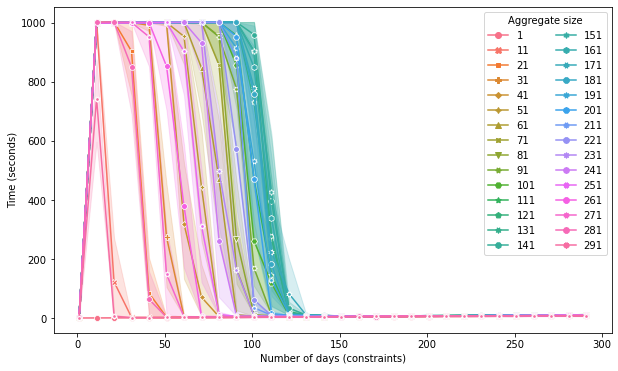

In [12]:
ax = sns.lineplot(data=df_days_a, x="days_size", y="time", hue="agg_size", style="agg_size", markers=True, dashes=False)
ax.legend(ncol=2, title="Aggregate size")
ax.set(xlabel='Number of days (constraints)', ylabel='Time (seconds)')

#### Filtré selon le nombre de jours

In [13]:
df_days = df[(df.wall_time == 1000)& (df["method"] == "rng") & (df.success == True)]
df_days.agg_size = df_days.agg_size.astype(str)

df_days

Unnamed: 0                                 expe          clients  \
42573          84  ./expes/v2_2020-11-23_di_250-prng-1  daily_issda_300   
42994         259  ./expes/v2_2020-11-23_di_250-prng-1  daily_issda_300   
43612         270  ./expes/v2_2020-11-23_di_250-prng-1  daily_issda_300   
45043         138  ./expes/v2_2020-11-23_di_250-prng-1  daily_issda_300   
45604         154  ./expes/v2_2020-11-23_di_250-prng-1  daily_issda_300   
...           ...                                  ...              ...   
55385          91  ./expes/v2_2020-11-23_di_250-prng-1  daily_issda_300   
55564         270  ./expes/v2_2020-11-23_di_250-prng-1  daily_issda_300   
56345         218  ./expes/v2_2020-11-23_di_250-prng-1  daily_issda_300   
56359         232  ./expes/v2_2020-11-23_di_250-prng-1  daily_issda_300   
59192         126  ./expes/v2_2020-11-23_di_250-prng-1  daily_issda_300   

       clients_size clients_subset agg_size method           days  days_size  \
42573           300        rng-300        1    rng    num-start-1          1   
42994           300        rng-300        1    rng    num-start-1          1   
43612           300        rng-300        1    rng    num-start-1          1   
45043           300        rng-300        1    rng    num-start-1          1   
45604           300        rng-300        1    rng    num-start-1          1   
...             ...            ...      ...    ...            ...        ...   
55385           300        rng-300      291    rng  num-start-291        291   
55564           300        rng-300      291    rng  num-start-291        291   
56345           300        rng-300      291    rng  num-start-291        291   
56359           300        rng-300      291    rng  num-start-291        291   
59192           300        rng-300      291    rng  num-start-291        291   

       days_total      time  valid  valid_sum  success  nsols  wall_hit  \
42573         536  0.073527   True        NaN     True      1     False   
42994         536  0.036271   True        NaN     True      1     False   
43612         536  0.035273   True        NaN     True      1     False   
45043         536  0.026578   True        NaN     True      1     False   
45604         536  0.039129   True        NaN     True      1     False   
...           ...       ...    ...        ...      ...    ...       ...   
55385         536  7.412287   True        NaN     True      1     False   
55564         536  7.240925   True        NaN     True      1     False   
56345         536  6.886496   True        NaN     True      1     False   
56359         536  7.082656   True        NaN     True      1     False   
59192         536  5.238851   True        NaN     True      1     False   

       wall_time  pooled  valid_sums  
42573       1000    True         1.0  
42994       1000    True         1.0  
43612       1000    True         1.0  
45043       1000    True         1.0  
45604       1000    True         1.0  
...          ...     ...         ...  
55385       1000    True         1.0  
55564       1000    True         1.0  
56345       1000    True         1.0  
56359       1000    True         1.0  
59192       1000    True         1.0  

[13208 rows x 19 columns]

[Text(0.5, 0, 'Number of days (constraints)'), Text(0, 0.5, 'Time (seconds)')]

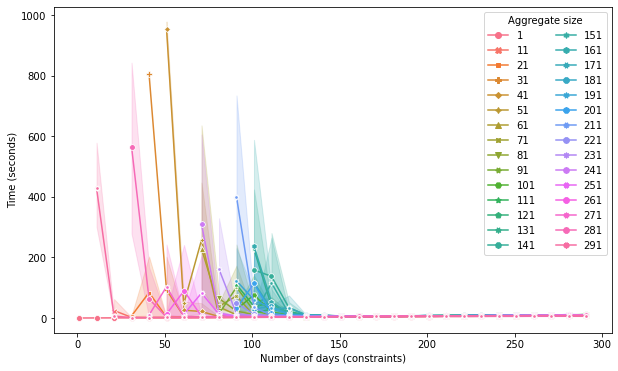

In [14]:
ax = sns.lineplot(data=df_days, x="days_size", y="time", hue="agg_size", style="agg_size", markers=True, dashes=False)
ax.legend(ncol=2, title="Aggregate size")
ax.set(xlabel='Number of days (constraints)', ylabel='Time (seconds)')

### Taux de succès en fonction du nombre de jours

[Text(0.5, 0, 'Number of days (constraints)'), Text(0, 0.5, 'Time (seconds)')]

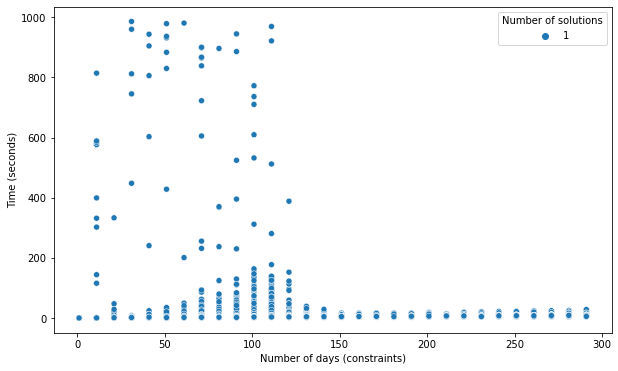

In [15]:
ax = sns.scatterplot(data=df_days, x="days_size", y="time", hue="nsols")
ax.legend(ncol=2, title="Number of solutions")
ax.set(xlabel='Number of days (constraints)', ylabel='Time (seconds)')

### Taux de succès fonction du wall_time et du nombre de jours

Groupé par méthode de sélection

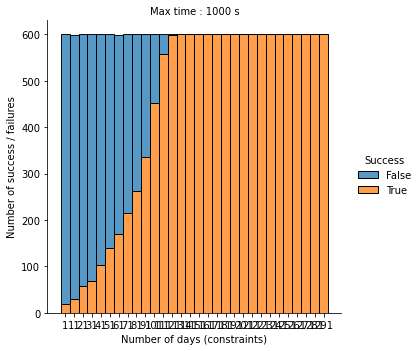

In [16]:
df_days = df
df_days.days_size = df_days.days_size.astype(str)
ax = sns.displot(data=df, x="days_size", hue="success", kind="hist", multiple="stack", col="wall_time")
ax.set(xlabel="Number of days (constraints)", ylabel="Number of success / failures")
ax.set_titles("Max time : {col_name} s")
ax.legend.set_title("Success")


### Succès fonction de la méthode de sélection, du nombre de jours et de la taille de l'agrégat

In [17]:
df_days

Unnamed: 0                                 expe          clients  \
42573          84  ./expes/v2_2020-11-23_di_250-prng-1  daily_issda_300   
42994         259  ./expes/v2_2020-11-23_di_250-prng-1  daily_issda_300   
43612         270  ./expes/v2_2020-11-23_di_250-prng-1  daily_issda_300   
45043         138  ./expes/v2_2020-11-23_di_250-prng-1  daily_issda_300   
45604         154  ./expes/v2_2020-11-23_di_250-prng-1  daily_issda_300   
...           ...                                  ...              ...   
55385          91  ./expes/v2_2020-11-23_di_250-prng-1  daily_issda_300   
55564         270  ./expes/v2_2020-11-23_di_250-prng-1  daily_issda_300   
56345         218  ./expes/v2_2020-11-23_di_250-prng-1  daily_issda_300   
56359         232  ./expes/v2_2020-11-23_di_250-prng-1  daily_issda_300   
59192         126  ./expes/v2_2020-11-23_di_250-prng-1  daily_issda_300   

       clients_size clients_subset  agg_size method           days days_size  \
42573           300        rng-300         1    rng    num-start-1         1   
42994           300        rng-300         1    rng    num-start-1         1   
43612           300        rng-300         1    rng    num-start-1         1   
45043           300        rng-300         1    rng    num-start-1         1   
45604           300        rng-300         1    rng    num-start-1         1   
...             ...            ...       ...    ...            ...       ...   
55385           300        rng-300       291    rng  num-start-291       291   
55564           300        rng-300       291    rng  num-start-291       291   
56345           300        rng-300       291    rng  num-start-291       291   
56359           300        rng-300       291    rng  num-start-291       291   
59192           300        rng-300       291    rng  num-start-291       291   

       days_total      time  valid  valid_sum  success  nsols  wall_hit  \
42573         536  0.073527   True        NaN     True      1     False   
42994         536  0.036271   True        NaN     True      1     False   
43612         536  0.035273   True        NaN     True      1     False   
45043         536  0.026578   True        NaN     True      1     False   
45604         536  0.039129   True        NaN     True      1     False   
...           ...       ...    ...        ...      ...    ...       ...   
55385         536  7.412287   True        NaN     True      1     False   
55564         536  7.240925   True        NaN     True      1     False   
56345         536  6.886496   True        NaN     True      1     False   
56359         536  7.082656   True        NaN     True      1     False   
59192         536  5.238851   True        NaN     True      1     False   

       wall_time  pooled  valid_sums  
42573       1000    True         1.0  
42994       1000    True         1.0  
43612       1000    True         1.0  
45043       1000    True         1.0  
45604       1000    True         1.0  
...          ...     ...         ...  
55385       1000    True         1.0  
55564       1000    True         1.0  
56345       1000    True         1.0  
56359       1000    True         1.0  
59192       1000    True         1.0  

[17997 rows x 19 columns]

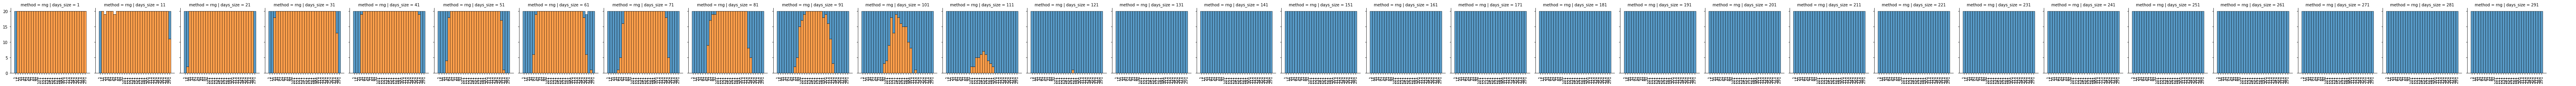

In [18]:
df_days = df[(df["wall_time"] == 1000)]  # & (df["wall_time"] == 20)
df_days.days_size = df_days.days_size.astype(str)
df_days.agg_size = df_days.agg_size.astype(str)
df_days.success = df_days.success.astype(str)

g = sns.FacetGrid(df_days, col="days_size", row="method")
g.map_dataframe(sns.histplot, x="agg_size", hue="success", multiple="stack", shrink=True, palette={"True": "C0", "False": "C1"})
g.add_legend()
g.set_xticklabels(rotation=90)

## Heatmap succès

In [19]:
df_hm = df[(df["wall_time"] == 1000)]
df_hm = df_hm[["days_size", "agg_size", "success"]]
df_hm.days_size = df_days.days_size.astype(str)
df_hm.agg_size = df_days.agg_size.astype(str)
#df_hm.success = df_days.success.astype(int64)

df_hm = pd.pivot_table(data=df_hm, values="success", index=["agg_size"], columns=["days_size"])
cols = [str(x) for x in sorted([int(x) for x in df_hm.columns])]
df_hm = df_hm[cols]
df_hm.index = df_hm.index.map(int)
df_hm = df_hm.sort_values(by=["agg_size"], ascending=False)
df_hm

days_size    1    11   21    31    41    51        61    71    81    91  ...  \
agg_size                                                                 ...   
291        0.0  0.45  1.0  1.00  1.00  1.00  1.000000  1.00  1.00  1.00  ...   
281        0.0  0.00  0.0  0.35  1.00  1.00  0.950000  1.00  1.00  1.00  ...   
271        0.0  0.00  0.0  0.00  0.05  0.95  1.000000  1.00  1.00  1.00  ...   
261        0.0  0.00  0.0  0.00  0.00  0.15  0.684211  1.00  1.00  1.00  ...   
251        0.0  0.00  0.0  0.00  0.00  0.00  0.100000  0.75  1.00  1.00  ...   
241        0.0  0.00  0.0  0.00  0.00  0.00  0.000000  0.10  0.75  1.00  ...   
231        0.0  0.00  0.0  0.00  0.00  0.00  0.000000  0.00  0.60  0.85  ...   
221        0.0  0.00  0.0  0.00  0.00  0.00  0.000000  0.00  0.00  0.45  ...   
211        0.0  0.00  0.0  0.00  0.00  0.00  0.000000  0.00  0.00  0.20  ...   
201        0.0  0.00  0.0  0.00  0.00  0.00  0.000000  0.00  0.00  0.05  ...   
191        0.0  0.00  0.0  0.00  0.00  0.00  0.000000  0.00  0.00  0.10  ...   
181        0.0  0.00  0.0  0.00  0.00  0.00  0.000000  0.00  0.00  0.00  ...   
171        0.0  0.00  0.0  0.00  0.00  0.00  0.000000  0.00  0.00  0.00  ...   
161        0.0  0.00  0.0  0.00  0.00  0.00  0.000000  0.00  0.00  0.00  ...   
151        0.0  0.00  0.0  0.00  0.00  0.00  0.000000  0.00  0.00  0.00  ...   
141        0.0  0.00  0.0  0.00  0.00  0.00  0.000000  0.00  0.00  0.00  ...   
131        0.0  0.00  0.0  0.00  0.00  0.00  0.000000  0.00  0.00  0.00  ...   
121        0.0  0.00  0.0  0.00  0.00  0.00  0.000000  0.00  0.00  0.00  ...   
111        0.0  0.00  0.0  0.00  0.00  0.00  0.000000  0.00  0.00  0.05  ...   
101        0.0  0.00  0.0  0.00  0.00  0.00  0.000000  0.00  0.00  0.15  ...   
91         0.0  0.00  0.0  0.00  0.00  0.00  0.000000  0.00  0.05  0.25  ...   
81         0.0  0.00  0.0  0.00  0.00  0.00  0.000000  0.00  0.05  0.75  ...   
71         0.0  0.00  0.0  0.00  0.00  0.00  0.000000  0.00  0.15  0.90  ...   
61         0.0  0.00  0.0  0.00  0.00  0.00  0.000000  0.20  0.55  1.00  ...   
51         0.0  0.00  0.0  0.00  0.00  0.00  0.050000  0.75  1.00  1.00  ...   
41         0.0  0.00  0.0  0.00  0.00  0.10  0.700000  0.95  1.00  1.00  ...   
31         0.0  0.00  0.0  0.00  0.05  0.80  1.000000  1.00  1.00  1.00  ...   
21         0.0  0.00  0.0  0.10  1.00  1.00  1.000000  1.00  1.00  1.00  ...   
11         0.0  0.00  0.9  1.00  1.00  1.00  1.000000  1.00  1.00  1.00  ...   
1          1.0  1.00  1.0  1.00  1.00  1.00  1.000000  1.00  1.00  1.00  ...   

days_size  201  211  221  231  241  251  261  271  281  291  
agg_size                                                     
291        1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
281        1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
271        1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
261        1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
251        1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
241        1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
231        1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
221        1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
211        1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
201        1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
191        1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
181        1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
171        1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
161        1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
151        1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
141        1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
131        1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
121        1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
111        1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
101        1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
91         1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
81         1.

[Text(0.5, 33.0, 'Number of days (constraints)'),
 Text(189.2400000000001, 0.5, 'Aggregate size')]

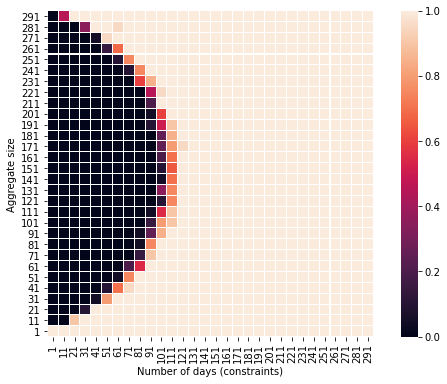

In [20]:
ax = sns.heatmap(data=df_hm, linewidths=.01, square=True)
ax.set(xlabel="Number of days (constraints)", ylabel="Aggregate size")